# Homework #3
# CP 5.3, 5.4, 5.7, 5.9, 5.10, 5.11, 5.12, 5.13, 5.19 
Newton Kwan
<br>
Professor Walter
<br>
PHY 566
<br>
5 February 2018 

In [3]:
from scipy.special.orthogonal import p_roots
from numpy import linspace, cos, tan, ones, copy
from math import sqrt, factorial
from math import pi, exp
import cmath
from numpy.polynomial import Polynomial as P 
from numpy import empty, array, linspace, zeros, loadtxt, sin, cos
from pylab import legend, xlabel, ylabel, title, imshow, plot, xlim, ylim, jet
import matplotlib
from scipy.constants import h, k, hbar, c
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### CP 5.3 [Gaussian Error Function. Use the trap rule for this problem] 

Consider the integral 

$$ E(x) = \int_{0}^{x} e^{-t^2}dt $$ 

We will write a program to calculate $E(x)$ for values of x from 0 to 3 in steps of 0.1. I will choose to Simpson's Rule with 100 slices. 

In [19]:
#defining constants here 
slices = 100 
start = 0 
end = 3 

For 10 slices, the approximate value is 0.886207


Text(0.5,1,'Plot of E(x) with 100 steps')

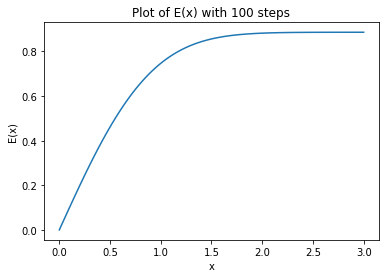

In [20]:
#This code performs Simpson's Rule to approximate the value 
#of the above given integral

def f(t): 
    '''
    This defines the function that we are trying
    to integrate. 
    '''
    return exp(-t**2)

def simpRule(slices, start, end):
    '''
    This calculates the value of an integral 
    using Simpson's rule and its parameters are
    the number of quadratics used to approximate
    the integral, starting point, and end point. 
    '''
    N = slices #number of slices 
    a = start #starting x value 
    b = end #ending x value 
    h = (b-a) / N
    s = f(a) + f(b) #this is initial part of the sum

    #we now compute the sums in the above equation 
        
    #for the odd terms 
    for i in range(1, N, 2): 
        s += 4* f(a+i*h)
    
    #for the even terms 
    for i in range(2, N, 2):
        s += 2* f(a+i*h)
    
    return((1/3)*h*s)

simp10 = simpRule(20, 0, 3)
print("For 10 slices, the approximate value is {:.6f}" .format(simp10))

'''
We will now graph this as a function of x with 100 steps. 
'''

steps = linspace(0, 3, 100)
valperstep = [] 

for i in steps:
    valperstep.append(simpRule(slices, 0, i))
    
plot(steps, valperstep)
xlabel("x")
ylabel("E(x)")
title("Plot of E(x) with 100 steps")

### CP 5.4 [Diffraction limited telescopes with Simpson's rule] 

The intensity of the light in the diffraction pattern from an astronomical observation is given by 

$$ I(r)= \left(\frac{J_1(kr)}{kr}\right)^2 $$ 

where $r$ is the distance in the focal place from the center of the diffraction pattern, $k = 2\pi/\lambda$, and $J_1(x)$ is a Bessel function. The Bessel functions $J_m(x)$ are given by 

$$ J_m(x) = \frac{1}{\pi}\int_{0}^{\pi}cos(m\theta - xsin\theta)d\theta$$, 

where $m$ is a nonnegative integer and $x \geq 0$.

In [303]:
#Define our constants 
N = 1000 #number of slices
start = 0 #starting point
end = pi #ending point
xstart = 0 #x starting place 
xend = 20 #x ending place 
xrange = linspace(xstart, xend, N) #dividing number of slices 

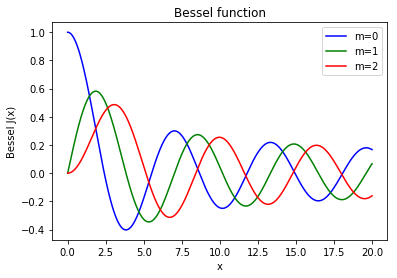

In [304]:
def JIntegrand(m, x, t):
    '''
    This returns the Bessel function inside the integral
    for a given nonnegative integer m and x
    '''
    return cos(m*t - x*sin(t))

def simpRule(slices, start, end, m, x):
    '''
    This calculates the value of an integral 
    using Simpson's rule and its parameters are
    the number of quadratics used to approximate
    the integral, starting point, ending point, m value, 
    and x value. 
    '''
    N = slices #number of slices 
    a = start #starting x value 
    b = end #ending x value 
    h = (b-a) / N
    #this is initial part of the sum
    s = JIntegrand(m, x, a) + JIntegrand(m, x, b) 

    #we now compute the sums in the above equation 
        
    #for the odd terms 
    for i in range(1, N, 2): 
        s += 4* JIntegrand(m, x, a+i*h)
    
    #for the even terms 
    for i in range(2, N, 2):
        s += 2* JIntegrand(m, x, a+i*h)
    
    return((1/3)*h*s)

def J(N, start, end, m, x):
    return (1 / pi)*simpRule(N, start, end, m, x)

#print(J(N, start, end, 1, 1))

def plotBessel(N, start, end, m):
    '''
    This function takes in number of slices N, 
    starting point, ending point, and m. It 
    returns a list of values of the Bessel 
    function at different m and x values. 
    '''
    Besselcoord = []
    for j in xrange:
        #Bessel = (1 / pi)*simpRule(N, start, end, m, j)
        Bessel = J(N, start, end, m, j)
        Besselcoord.append(Bessel)
    return Besselcoord

#We plot the Bessel functions of m=0,1,2
J_0 = plotBessel(N, start, end, 0)
J_1 = plotBessel(N, start, end, 1)
J_2 = plotBessel(N, start, end, 2)
plot(xrange, J_0, "b", label = "m=0")
plot(xrange, J_1, "g", label = "m=1")
plot(xrange, J_2, "r", label = "m=2")
ylabel("Bessel J(x)")
xlabel("x")   
title("Bessel function")
legend(loc = "upper right")

In [109]:
#Define constants 
points = 1000
axisrange = linspace(-1e-6, 1e-6, points) 
wavelength = 500e-9 #wavelength of light 
k = 2*pi / wavelength #k value 
m = 1 #m value 
N = 50

Text(0.5,1,'Bessel Density Plot')

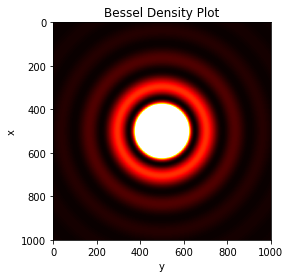

In [110]:
BesselArray = zeros([points, points], float)
xvalues = array(axisrange, float)
yvalues = array(axisrange, float)

for i in range(0, points, 1): 
    x = xvalues[i]
    for j in range(0, points, 1):
        y = yvalues[j]
        r = sqrt(x**2 + y**2)
        BesselArray[i, j] = (J(N, start, end, m, (k*r)) / (k*r))**2
        
#print(BesselArray)
imshow(BesselArray, "hot", vmax=0.01)
xlabel("y")
ylabel("x")
title("Bessel Density Plot")

### CP 5.7 [Romberg Integration] 

Considering the integral

$$ I = \int_{0}^{1}sin^2\sqrt{100x}dx $$

We will write a program that uses the adaptive trapezoidal rule method of section 5.3 (Choosing the Number of Steps) and the equation 

$$I_i = \frac{1}{2}I_{i-1} + h_i \sum_{kodd, 1...N_i-1} f(a + kh_i) $$ 

to calculate the value of this integral to an approximate accuracy of $\epsilon = 10^{-6}$ (the final result will be around I = 0.45). 

In [287]:
#Define constants 
desirederror = 1e-6 #the error that we want 
b = 1 #end point 
a = 0 #start point 
N = 1 #initial N 

In [288]:
def f(x):
    return sin(sqrt(100*x))**2

def traprule(start, end, slices):
    '''
    This returns the approx. integral of a function
    using the adap trapezoidal rule. It takes in the number
    of trapezoids used to approximate the value of the 
    integral. 
    '''
    N = slices
    a = start
    b = end
    h = (b-a) / N 

    s = 0.5*f(a) + 0.5*f(b)
    for k in range(1,N):
        s += f(a+k*h)
    
    return h*s

def error(prevI, I):
    '''
    This function calculates the error asssociated
    with the trapezoidal rule 
    '''
    return (1/3) * (I - prevI)

In [289]:
currenterror = 0
N = 1 
currentI = traprule(a,b, N)
N = 2*N 
Inext = traprule(a,b,N)
currenterror = error(currentI, Inext)
while abs(currenterror) > desirederror:
    N = 2*N 
    currentI = Inext 
    Inext = traprule(a,b,N)
    currenterror = error(currentI, Inext)
    
print("To get error less than 1e-6, we used", N , "trapezoids")
print("The value of the integral is approximately {:.3f}" .format(Inext))

To get error less than 1e-6, we used 4096 trapezoids
The value of the integral is approximately 0.456


We repeat the above process but use Romberg integration 

In [290]:
#Define constants 
start = 0 
end = 1
desirederror = 1e-6
N = 1 #intialize N slices 

In [299]:
'''
Calculate the first two estimates of the integral using the 
regular trapezoidal rule. I tried to hardcode the answer and 
my answers didn't agree with what I coded above.
'''

m = 1
result = [[]]
N = 1 #one slice first 
R11 = traprule(start, end, N) #I1
result[0].append(R11)

N = N*2 #two slices 
R21 = traprule(start, end, N) #I2
result.append([R21])

def error(R_im, R_iminus1m, m):
    return (1/(4**m -1))*(R_im - R_iminus1m)

R21error = error(R21, R11, 1)
if abs(R21error) < desirederror: 
    for i in result:
        print(i)
              
'''
Using I1 and I2, calculate the more accurate estimate 
R_22 using the equation 5.51 
'''

def Romberg(R_im, R_iminus1m, m):
    '''
    Takes the previous R_i,m and R_i-1,m and m
    and returns R_i,m+1
    '''
    return R_im + (1/((4**m) - 1)) * (R_im - R_iminus1m)


R22 = Romberg(R21, R11, 1)
result[1].append(R22)

for i in range(2, 50): #arbitrarily large number 
    N = N * 2
    firstcolumnromberg = traprule(start, end, N) #starts at R31
    result.append([firstcolumnromberg])
    for j in range(1, i+1):
        currenterror = error(result[i][j-1], result[i-1][j-1], j)
        nextromberg = Romberg(result[i][j-1], result[i-1][j-1], j)
        result[i].append(nextromberg)
    if abs(currenterror) < desirederror:
        print("Romberg used", N, "slices")
        print("Adaptive trap used 4096 slices")
        print("After i =", j+1,", romberg's approx. is good enough" )
        print("The approx. of the integral is", result[-1][-1])
        print("Romberg was much faster")
        print()
        print("Romberg Table")
        print()
        for i in result:
            print(i)
        print()
        break

Romberg used 64 slices
Adaptive trap used 4096 slices
After i = 7 , romberg's approx. is good enough
The approx. of the integral is 0.455832494461
Romberg was much faster

Romberg Table

[0.14797948454665205]
[0.3252319078064746, 0.38431604889308213]
[0.51228285072333146, 0.57463316502895045, 0.58732097277134165]
[0.40299744847824825, 0.3665689810632205, 0.35269803546550516, 0.34897386185747603]
[0.43010336929474696, 0.43913867623357988, 0.44397665591160385, 0.44542552290281179, 0.44580376471083272]
[0.4484146657874698, 0.4545184312850441, 0.45554374828847505, 0.45572735292937777, 0.4557677522628153, 0.45577749223109681]
[0.45391293121537596, 0.45574568635801133, 0.45582750336287581, 0.45583200741167584, 0.45583241782141032, 0.45583248103310003, 0.45583249446137891]



### CP 5.9 [Heat Capacity using Gaussian quadrature] 

The Debye's theory of solids gives the head capacity of a solid at temperature T to be 

$$ C_V = 9V\rho k_B (\frac{T}{\theta_D})^3 \int_{0}^{\frac{\theta_D}{T}}\frac{x^4 e^x}{(e^x - 1)^2} dx$$

where $V$ isthe volume, $\rho$ is the number density of atoms, $k_B$ is Boltzmann's constant, and $\theta_D$ is the so-called Debye temperature. 

We calculate $C_v$ using Gaussian quadrature at N = 50 and make a graph of the heat capacity as a function of temperature from T = 5K to T = 500K

In [14]:
#Define constants 
rho = 6.022e28 #m^-3 
dtemp = 428 #Kelvin 
N = 50 #sample points
#boltzmann defined as k 
V = 1e-3 #m^3

In [39]:
#define function we want to integrate w/o constants
def f(x): 
    '''
    This is the function we want to integrate
    '''
    return (x**4)*exp(x) / ((exp(x) - 1)**2)

#[-1, 1] Legendre polynomial roots 
x, w = p_roots(N)

def cv(T):
    '''
    This takes T and returns C_v
    '''
    b = dtemp / T 
    a = 0 
    xp = 0.5 * (b-a)*x + 0.5*(b+a)
    wp = 0.5 * (b-a)*w
    s = 0.0 
    for i in range(0, N):
        s += f(xp[i]) * wp[i]
    return 9 * rho * V * k * ((T / dtemp)**3) * s

Text(0.5,1,'Heat Capacity')

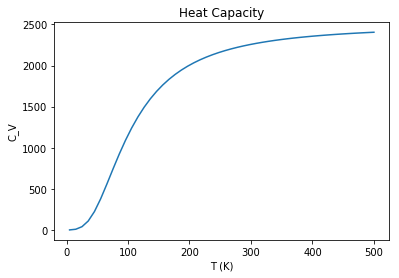

In [40]:
itemp = 5 # Kelvin
ftemp = 500 #Kelvin
temprange = linspace(itemp, ftemp, N)
cvs = [] 
for i in temprange: 
    y = cv(i)
    cvs.append(y)

plot(temprange, cvs)
xlabel("T (K)")
ylabel("C_V")
title("Heat Capacity")

### CP 5.10 [Period of an anharmonic oscillator with Gaussian quadrature] 

Derivation: 

$$ E = \frac{1}{2}m(\frac{dx}{dt})^2 + V(x) $$

We set $E = V(a)$

rearrange to isolate $\frac{dx}{dt}$

$$ \frac{dx}{dt} = \sqrt{\frac{2}{m}(V(a) - (Vx)}$$

moving dt over and intergrating it from $0$ to $\frac{1}{4}T$

$$\int_{0}^{\frac{1}{4}T} dt = \int_{0}^{a}\frac{dx}{\sqrt{\frac{2}{m}(V(a)-V(x))}} $$

Finally, we get the period of an anharmonic oscillator: 

$$ T = \sqrt{8m}\int_{0}^{a}\frac{dx}{\sqrt{V(a)-V(x)}}$$

Assuming the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$, we calculate 
the period of the oscillator for a given amplitude using Gaussian quadrature with
N = 20 opoints and then graph it from a = 0 to a = 2. 

In [144]:
#Define constants 
m = 1 #mass kg 
#a = 0 #start point 
b = 2 #end point
N = 20 #number of points 

In [145]:
def V(x): 
    return x**4

def f(x, af): 
    return 1 / sqrt(V(af) - V(x))

#[-1, 1] Legendre polynomial roots 
x, w = p_roots(N)

def period(b):
    '''
    This takes the end point as a parameter
    '''
    #b = 2 #end point
    a = 0 #start point
    xp = 0.5 * (b-a)*x + 0.5*(b+a)
    wp = 0.5 * (b-a)*w
    s = 0.0 
    for i in range(0, N):
        s += f(xp[i], b) * wp[i]
    return sqrt(8*m)* s

In [146]:
print("The period of the oscillator is", period(b))

The period of the oscillator is 1.82404704202


Text(0.5,1,'Period vs amplitude')

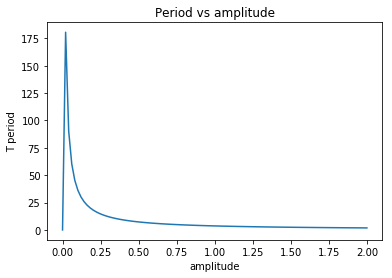

In [147]:
start = 0 
end = 2 
periods = [] 
periodrange = linspace(0, 2, 100)
for i in periodrange: 
    if i == 0:
        periods.append(0)
        continue
    y = period(i)
    periods.append(y)
    
plot(periodrange, periods)
xlabel("amplitude")
ylabel("T period")
title("Period vs amplitude")

As seen from the graph, as the amplitude increases, the period decreases. In addition, the period diverges as the amplitude goes to zero. These results can be explained by fact that $V(x) = x^4$. As the amplitude increases, the period quickly decreases (meaning that the ball is moving very fast) 

### CP 5.11 [Diffraction around edges with Gaussian quadrature] 

We will calculate the integral using Gaussian quadrature for $N = 50$ points 

$$I = \frac{I_0}{8}([2C(u) + 1]^2 + [2S(u) + 1]^2) $$

where 

$$u = x\sqrt{\frac{2}{\lambda z}}, \qquad C(u) = \int_{0}^{u}\cos{\frac{1}{2}\pi t^2}dt,  \qquad S(u) = \int_{0}^{u}\sin{\frac{1}{2}\pi t^2}dt $$


We will plot I as a function of x in the range -5 to 5

In [43]:
lamb = 1 #meters
z = 3 #distance from straight edge meters 
N = 50 #number of points 

This plot does not include the I_0 factor


Text(0.5,1,'Intensity vs z')

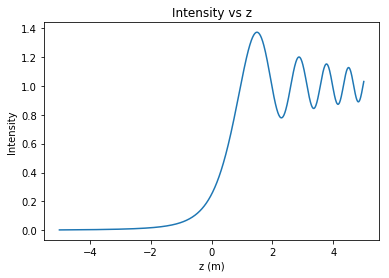

In [69]:
#[-1, 1] Legendre polynomial roots 
x, w = p_roots(N)

def u(p):
    '''
    Define u used for other equations 
    '''
    return p * sqrt(2 / (lamb * z))

def c(t):
    '''
    Integrand of C(u)
    '''
    return cos((1/2)*pi*t**2)

def s(t):
    '''
    Integrand of S(u)
    '''
    return sin((1/2)*pi*t**2)

def C(u):
    '''
    Integral of c(t)
    '''
    b = u #end point
    a = 0 #start point
    xp = 0.5 * (b-a)*x + 0.5*(b+a)
    wp = 0.5 * (b-a)*w
    s = 0.0 
    for i in range(0, N):
        s += c(xp[i]) * wp[i]
    return s

def S(u):
    '''
    Integral of s(t)
    '''
    b = u #end point
    a = 0 #start point
    xp = 0.5 * (b-a)*x + 0.5*(b+a)
    wp = 0.5 * (b-a)*w
    g = 0.0 
    for i in range(0, N):
        g += s(xp[i]) * wp[i]
    return g

def I(S, C): 
    return (1/8) * ((2*C + 1)**2 + (2*S + 1)**2)

intensities = []
xrange = linspace(-5, 5, 1000)

for i in xrange: 
    #print("hi")
    ucalc = u(i)
    Scalc = S(ucalc)
    Ccalc = C(ucalc)
    Icalc = I(Scalc, Ccalc)
    intensities.append(Icalc)
    
print("This plot does not include the I_0 factor")
plot(xrange, intensities)
xlabel("z (m)")
ylabel("Intensity")
title("Intensity vs z")

### CP 5.12 [The Stefan Boltzmann constant with Gaussian quadrature] 

The Planck theory of thermal radiation tells us that in the (angular) frequency interval $w$ to $w to dw$, a black body of unti area radiates electromagnetically an amount of thermal energy per second equal to $I(\omega)d\omega$, where 

$$I(\omega) = \frac{\hbar}{4\pi^2 c^2} \frac{\omega^3}{(e^{\hbar \omega / k_B T} -1)}$$

We now derive the total rate at which energy is radiated by a black body per unit area, over all frequencies

Substitute into $I(\omega)$ that $\frac{\hbar \omega} {k_B T} = x$ 

$$I(\omega) = \frac{\hbar k_B^3 T^3}{4\pi^2 c^2 \hbar^3} \frac{x^3}{(e^{x} -1)}$$

Multiply both sides by $d \omega$

$$I(\omega)d\omega = \frac{k_B^3 T^3}{4\pi^2 c^2 \hbar^2} \frac{x^3}{(e^{x} -1)} d\omega$$

Substitute $d\omega = \frac{k_B T dx}{\hbar}$

$$I(\omega)d\omega  = \frac{k_B^4 T^4}{4\pi^2 c^2 \hbar^3}\frac{x^3}{(e^{x} -1)}dx$$

Integrate both sides and we get the total rate at which energy is radiated by a black body per unit area, over all frequencies

$$W = \frac{k_B^4 T^4}{4\pi^2 c^2 \hbar^3}\int_{0}^{\infty}\frac{x^3}{(e^{x} -1)}$$



I will use Gaussian quadrature to evaluate the integral in the above equation because it's easy to program and I 
don't necessarily need equal spacing. 

For ranges from 0 to $\infty$, we make the substitution
of 

$$x = \frac{z}{1-z} \qquad dx = \frac{dz}{(1-z)^2}$$

We'll calculate the integral inside of $W$

We will calculate the Stefan Boltzmann constant

The value of the Stefan-Boltzmann constant is approximately 5.67 x 10 -8 watt per meter squared per kelvin to the fourth (W · m -2 · K -4 ).

In [96]:
#Define constants 
#k Boltzmann's constant
#c speed of light 
#hbar is Planck's constant over 2pi
a = 0 #originally 0 
b = 1 #originally infinity 
N = 30

In [111]:
#[-1, 1] Legendre polynomial roots 
x, w = p_roots(N)

#note because of the bounds, we need to change variables 
def f(z): 
    return (((z/(1-z))**3) / (exp(z / (1-z)) - 1)) / (1 - z)**2

def W(a,b): 
    xp = 0.5 * (b-a)*x + 0.5*(b+a)
    wp = 0.5 * (b-a)*w
    s = 0.0 
    for i in range(0, N):
        s += f(xp[i]) * wp[i]
    return (k**4 / (4*(pi**2)*(c**2)*(hbar**3))) * s

#z = 10 
#integrand = f(z)
#print(integrand)

Wint = W(a,b)
print("Our calculated Stefan-Boltzmann constant is {:.3E}" .format(Wint))
print("This has good agreement with the true value")


Our calculated Stefan-Boltzmann constant is 5.670E-08
This has good agreement with the true value


### CP 5.13 [Quantum uncertainty in the harmonic with Gaussian quadrature] 

The wavefunction of the nth energy level of the one dimensional quantum harmonic oscillator is given by 

$$ \Psi_n(x) = \frac{1}{\sqrt{2^n!\sqrt{\pi}}} e^{-x^2 / 2} H_n(x)$$

We'll calculate a function to determine Hermimite polynomials. We'll use this function to plot the HO wave functions for n =0, 1, 2, 3 in the range x = -4 to 4. 

$$H_{n+1}(x) = 2xH_n(x) - 2nH_{n-1}(x)$$

Then we'll plot with n = 30 and from x = -10 to 10 
 
Then we'll calculate the uncertainty using the root-mean-square position 

$$<x^2> = \int_{-\infty}^{\infty} x^2|\Psi_n(x)|^2dx$$

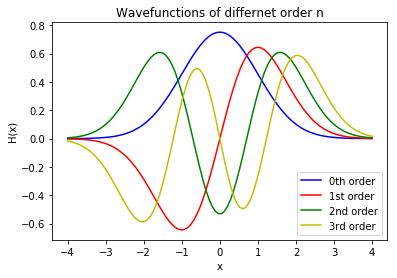

In [18]:
def H(n, x):
    H0 = 1 
    H1 = 2*x
    #for H0
    if n == 0: 
        return H0 
    #for H1
    if n == 1: 
        return H1
    #for H2
    if n == 2: 
        return 2*x*H1 - 2*H0
    return 2*x*H(n - 1, x) - 2*(n - 1)*H(n-2, x)

def psi(n, x): 
    return (1/sqrt((2**n)*factorial(n)*sqrt(pi)))*exp(-(x**2)/2)*H(n, x)

xrange = linspace(-4, 4, 100)

zerothH= []
firstH = []
secondH = []
thirdH = []

for i in xrange: 
    n = 0 
    wavefunction = psi(n, i)
    zerothH.append(wavefunction)
    
for i in xrange:
    n = 1 
    wavefunction = psi(n, i)
    firstH.append(wavefunction)
    
for i in xrange:
    n = 2
    wavefunction = psi(n, i)
    secondH.append(wavefunction)
    
for i in xrange: 
    n = 3
    wavefunction = psi(n, i)
    thirdH.append(wavefunction)
    
plot(xrange, zerothH, "b", label = "0th order")
plot(xrange, firstH, "r", label = "1st order")
plot(xrange, secondH, "g", label = "2nd order")
plot(xrange, thirdH, "y", label = "3rd order")
xlabel("x")
ylabel("H(x)")
title("Wavefunctions of differnet order n")
legend(loc = "lower right")


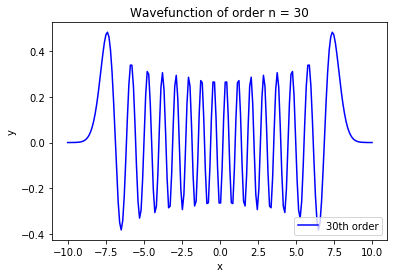

In [164]:
thirtyth = [] 
xrange = linspace(-10, 10, 200)
for i in xrange: 
    n = 30 
    wavefunction = psi(n, i)
    thirtyth.append(wavefunction)
    
plot(xrange, thirtyth, "b", label = "30th order")
xlabel("x")
ylabel("y")
title("Wavefunction of order n = 30")
legend(loc = "lower right")

In [16]:
#define constants 
b = 1 #originally infinity 
a = -1 #originally -infinity
n = 5 
N = 100 

In [17]:
#[-1, 1] Legendre polynomial roots 
x, w = p_roots(N)

def f(n, z): 
    return (z/(1-z**2))**2*abs(psi(n,z/(1-z**2)))**2*((1+z**2)/(1-z**2)**2)

def rms(a,b): 
    xp = 0.5 * (b-a)*x + 0.5*(b+a)
    wp = 0.5 * (b-a)*w
    s = 0.0 
    for i in range(0, N):
        s += f(n, xp[i]) * wp[i]
    return sqrt(s)

answer = rms(a,b)
print("The root-mean-square position is {:.3f}" .format(answer))

The root-mean-square position is 2.345


### CP 5.19  [Diffraction gratings. I suggest using Simpson's rule for this problem. Gaussian Quadrature will require a very large number of points] 

Light with a wavelength $\lambda$ is incident on a diffraction grating of total width $w$, which is then focused with a lens of focal length $f$ falls on a screen a distance x from the central axis of the system. Theory tells us that the intensity at this spot is 

$$I(x) = \left|\int_{-w/2}^{w/2}\sqrt{q(u)}e^{i2\pi xu / \lambda f}du^2\right|^2$$


Observing a function $q(u) = sin^2(\alpha u)$, the separation of the slits $d$ in this grating express in terms of $\alpha$ is 
$$d = \pi / \alpha$$ 
The key insight is that since the function we are given is a the square of a sine wave, the distance between the midpoints of two slits is one period. 

In [8]:
#Define constants 
d = 20e-6 #slit width in meters 
alpha = pi / d 
slits = 10 #number of slits 
wlength = 500e-9 #meters
flength = 1 #focal length in meters
screenwidth = 0.1 #meters 
w = d * slits #total width of grating 
start = -w/2 #start point 
end = w/2 #end point
slices = 1000 #number of slices for simpson's rule

Text(0.5,1,'Intensity')

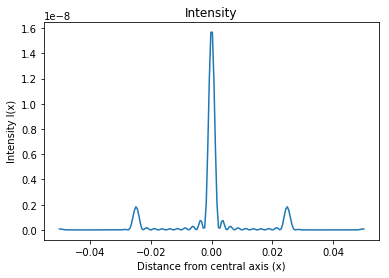

In [9]:
#We write a function that returns the transmission function at a 
#position u for a grating whose slits have seperation 20 micrometers 
#or 20e-6

def q(u): 
    return sin(alpha*u)**2

def f(u, x):
    return cmath.sqrt(q(u))*cmath.exp(1j*2*pi*x*u / (wlength*flength)) 

def simpRule(start, end, slices, x):
    '''This calculates the value of an integral 
    using Simpson's rule and its parameters are
    the number of quadratics used to approximate
    the integral. 
    '''
    a = start 
    b = end 
    N = slices #number of slices 
    h = (b-a) / N
    s = f(a, x) + f(b, x) #this is initial part of the sum

    #we now compute the sums in the above equation 
        
    #for the odd terms 
    for i in range(1, N, 2): 
        s += 4* f(a+i*h, x)
    
    #for the even terms 
    for i in range(2, N, 2):
        s += 2* f(a+i*h, x)
    
    return((1/3)*h*s)

xrange = linspace(-0.05, 0.05, 200)

#print(simpRule(start, end, slices, 1))

intensities = [] 
def I(x): 
    '''
    This takes in an argument x 
    and returns the intesity of at x 
    after a diffraction grating 
    '''
    
    #calculate the integral first 
    #for i in xrange()
    integral = simpRule(start, end, slices, x)
    intensity = (abs(integral))**2
    return intensity

#print(I(1))

for i in xrange: 
    intensities.append(I(i))
    
plot(xrange, intensities)
xlabel("Distance from central axis (x)")
ylabel("Intensity I(x)")
title("Intensity")

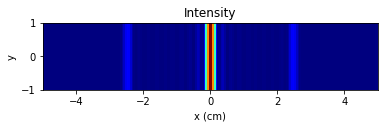

In [10]:
screen = zeros([len(intensities), len(intensities)])

for i in range(0, len(intensities), 1):
    for k in range(0, len(intensities), 1):
        screen[i, k] = intensities[k]
        
imshow(screen, extent=[-5, 5, -1, 1])
title("Intensity")
xlabel("x (cm)")
ylabel("y")
jet()

Create a few more pictures with new parameters 

In [5]:
#Define constants 
d = 20e-6 #slit width in meters 
alpha = pi / d 
beta = (1/2)*alpha
slits = 10 #number of slits 
wlength = 500e-9 #meters
flength = 1 #focal length in meters
screenwidth = 0.1 #meters 
w = d * slits #total width of grating 
start = -w/2 #start point 
end = w/2 #end point
slices = 1000 #number of slices for simpson's rule

Text(0.5,1,'Intensity')

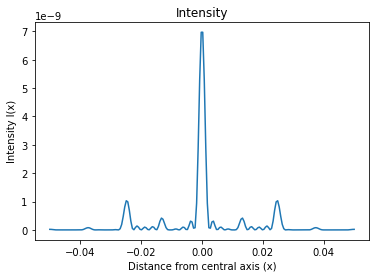

In [6]:
#We write a function that returns the transmission function at a 
#position u for a grating whose slits have seperation 20 micrometers 
#or 20e-6

def q(u): 
    return (sin(alpha*u)**2)*(sin(beta*u)**2)

def f(u, x):
    return cmath.sqrt(q(u))*cmath.exp(1j*2*pi*x*u / (wlength*flength)) 

def simpRule(start, end, slices, x):
    '''This calculates the value of an integral 
    using Simpson's rule and its parameters are
    the number of quadratics used to approximate
    the integral. 
    '''
    a = start 
    b = end 
    N = slices #number of slices 
    h = (b-a) / N
    s = f(a, x) + f(b, x) #this is initial part of the sum

    #we now compute the sums in the above equation 
        
    #for the odd terms 
    for i in range(1, N, 2): 
        s += 4* f(a+i*h, x)
    
    #for the even terms 
    for i in range(2, N, 2):
        s += 2* f(a+i*h, x)
    
    return((1/3)*h*s)

xrange = linspace(-0.05, 0.05, 200)

#print(simpRule(start, end, slices, 1))

intensities = [] 
def I(x): 
    '''
    This takes in an argument x 
    and returns the intesity of at x 
    after a diffraction grating 
    '''
    
    #calculate the integral first 
    #for i in xrange()
    integral = simpRule(start, end, slices, x)
    intensity = (abs(integral))**2
    return intensity

#print(I(1))

for i in xrange: 
    intensities.append(I(i))
    
plot(xrange, intensities)
xlabel("Distance from central axis (x)")
ylabel("Intensity I(x)")
title("Intensity")

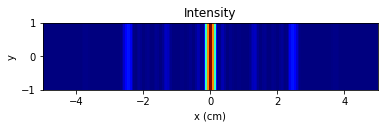

In [252]:
screen = zeros([len(intensities), len(intensities)])

for i in range(0, len(intensities), 1):
    for k in range(0, len(intensities), 1):
        screen[i, k] = intensities[k]
        
imshow(screen, extent=[-5, 5, -1, 1])
xlabel("x (cm)")
ylabel("y")
title("Intensity")
jet()

Now we calculate the diffraction pattern for non-identical slits, one $10\mu m$ and the other $20\mu m$, with a $60\mu m$ gap

In [279]:
#Define constants 
#d = 20e-6 #slit width in meters 
alpha = pi / d 
beta = (1/2)*alpha
slits = 10 #number of slits 
wlength = 500e-9 #meters
flength = 1 #focal length in meters
screenwidth = 0.1 #meters 
w = 100e-6 #total width of grating 
start = -w/2 #start point 
end = w/2 #end point
slices = 1000 #number of slices for simpson's rule

Text(0.5,1,'Intensity')

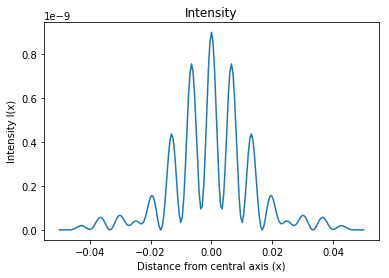

In [284]:
#We write a function that returns the transmission function at a 
#position u for a grating whose slits have seperation 20 micrometers 
#or 20e-6

def f(u, x):
    '''
    We arbitrarily set the width of the grating to be 100micrometers, 
    so there are 5micrometers of buffer on each side. 
    '''
    if u >= -w/2 and u < (-w/2)+5e-6: 
        return 0 
    if u >= (-w/2)+5e-6 and u < (-w/2) + 15e-6: 
        return cmath.exp(1j*2*pi*x*u / (wlength*flength))
    if u >= (-w/2) + 15e-6 and u < (-w/2) + 75e-6:
        return 0
    if u >= (-w/2) + 75e-6 and u < (-w/2) + 95e-6:
        return cmath.exp(1j*2*pi*x*u / (wlength*flength)) 
    if u >= (-w/2) + 95e-6 and u <= w/2: 
        return 0 
        

def simpRule(start, end, slices, x):
    '''This calculates the value of an integral 
    using Simpson's rule and its parameters are
    the number of quadratics used to approximate
    the integral. 
    '''
    a = start 
    b = end 
    N = slices #number of slices 
    h = (b-a) / N
    s = f(a, x) + f(b, x) #this is initial part of the sum

    #we now compute the sums in the above equation 
        
    #for the odd terms 
    for i in range(1, N, 2): 
        s += 4* f(a+i*h, x)
    
    #for the even terms 
    for i in range(2, N, 2):
        s += 2* f(a+i*h, x)
    
    return((1/3)*h*s)

xrange = linspace(-0.05, 0.05, 199)

intensities = [] 
def I(x): 
    '''
    This takes in an argument x 
    and returns the intesity of at x 
    after a diffraction grating 
    '''
    
    #calculate the integral first 
    #for i in xrange()
    integral = simpRule(start, end, slices, x)
    intensity = (abs(integral))**2
    return intensity

for i in xrange: 
    intensities.append(I(i))
    
plot(xrange, intensities)
xlabel("Distance from central axis (x)")
ylabel("Intensity I(x)")
title("Intensity")

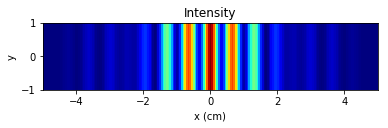

In [285]:
screen = zeros([len(intensities), len(intensities)])

for i in range(0, len(intensities), 1):
    for k in range(0, len(intensities), 1):
        screen[i, k] = intensities[k]
        
imshow(screen, extent=[-5, 5, -1, 1])
xlabel("x (cm)")
ylabel("y")
title("Intensity")
jet()